<a href="https://colab.research.google.com/github/ChapeuG/CASE-ANALISTA-DE-DADOS/blob/main/Case_Analista.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CASE ANALISTA DE DADOS

Análise:

Antes de inciar qualquer análise de dados, realizei algumas pesquisas para contruir uma base e entender a fundo as cidades desbancarizadas, o perfil dessas pessoas e qual motivo de estarem nessa situação

****

Atualmente temos entre 45  milhões de brasileiros desbancarizados, ou seja, brasileiros que não movimentam a conta bancária há mais de seis meses ou que optaram por não ter conta em banco.

***Em cada três brasileiros, um não possui conta bancária.***

#Objetivo 

Converter 1.000 clientes nas cidades mais desbancarizadas do Brasil

*   Classificar as cidades brasileira pelo nível de bancarização.
*   Estimar o número de clientes convertidos em cada cidade



#Bibliotecas

In [70]:
import pandas as pd
import numpy as np
from matplotlib import cm

In [71]:
# Importando Plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [72]:
!pip install plotly==4.12.0

#Base de Dados

Agências

In [73]:
fonte = 'https://github.com/ChapeuG/CASE-ANALISTA-DE-DADOS/blob/main/Dados/bancos/202010AGENCIAS.xlsx?raw=true'
dados_agencias = pd.read_excel(fonte,header=9,skipfooter=3)

Postos de Atendimento

In [74]:
fonte = 'https://github.com/ChapeuG/CASE-ANALISTA-DE-DADOS/blob/main/Dados/bancos/202010POSTOS.xlsx?raw=true'
dados_postos = pd.read_excel(fonte,header=9,skipfooter=3)

Postos de Atendimento Eletrônico

In [75]:
fonte = 'https://github.com/ChapeuG/CASE-ANALISTA-DE-DADOS/blob/main/Dados/bancos/202010PAE.xlsx?raw=true'
dados_pae = pd.read_excel(fonte,header=9,skipfooter=3)

Dados do Case

In [76]:
fonte = "https://github.com/ChapeuG/CASE-ANALISTA-DE-DADOS/blob/main/Dados/CASE.xlsx?raw=true"
case = pd.read_excel(fonte,convert_float = False)

In [77]:
case

,UF,MUNICIPIO,Total_Postos,Total_PAE,Total_Agências,Populacao,Coeficiente de ajuste populacional,IDHM,Nível de bancarização,Teledensidade estadual
0,GO,ABADIA DE GOIAS,2.000000,2.000000,nan,8958.000000,10.000000,0.708000,0.000447,0.407122
1,MG,ABADIA DOS DOURADOS,2.000000,1.000000,nan,7006.000000,10.000000,0.689000,0.000428,0.225949
2,GO,ABADIANIA,1.000000,2.000000,2.000000,20461.000000,15.000000,0.689000,0.000244,0.178242
3,MG,ABAETE,2.000000,6.000000,3.000000,23250.000000,15.000000,0.698000,0.000473,0.068086
4,PA,ABAETETUBA,1.000000,15.000000,7.000000,159080.000000,20.000000,0.628000,0.000145,0.011611
...,...,...,...,...,...,...,...,...,...,...
4963,PA,XINGUARA,1.000000,5.000000,5.000000,45086.000000,15.000000,0.552000,0.000244,0.040966
4964,BA,XIQUE-XIQUE,nan,3.000000,4.000000,46523.000000,15.000000,0.646000,0.000150,0.084474
4965,SP,ZACARIAS,2.000000,2.000000,nan,2752.000000,5.000000,0.623000,0.001453,0.244549
4966,MA,ZE DOCA,nan,3.000000,4.000000,51956.000000,15.000000,0.729000,0.000135,0.023116


##Tratamento da base de dados

Algumas colunas apresentam espaço em seus nomes, para não atrapalhar a análise, vou estar removendo esses espaços

In [78]:
dados_postos.columns = dados_postos.columns.str.strip()
dados_pae.columns = dados_pae.columns.str.strip()
dados_agencias.columns = dados_agencias.columns.str.strip()

Escolhendo quantas casas decimais vou utilizar

In [79]:
pd.options.display.float_format = "{:.6f}".format

#Desenvolvimento

***
Abaixo eu realizo a criação de um novo DATAFRAME para visualização dos dados.
Também realizo a soma das agências, postos de atendimento e postos de atendimento eletronico daquele municipio.

In [80]:
#Contagem do total de postos de atendimento por estado 
dados_postos_contagem = dados_postos['MUNICIPIO'].value_counts(ascending=False) 
#Contagem do total de postos de atendimento eletronico por estado 
dados_pae_contagem = dados_pae['MUNICIPIO'].value_counts(ascending=False)
#Contagem do total de agencias por estado 
dados_agencias_contagem = dados_agencias['MUNICíPIO'].value_counts(ascending=False)

In [81]:
contagem = pd.DataFrame({'Total_Postos' : dados_postos_contagem,'Total_PAE' : dados_pae_contagem,'Total_Agências' : dados_agencias_contagem})
contagem.reset_index(drop=False, inplace= True)
contagem.rename({'index' : 'MUNICIPIO'}, axis=1, inplace= True)

In [82]:
contagem = contagem.set_index('MUNICIPIO')
contagem = contagem.sort_values('MUNICIPIO',ascending=True)
contagem =contagem.drop(["13080-650", "76450-000"])
contagem.reset_index(inplace=True)

In [83]:
contagem

,MUNICIPIO,Total_Postos,Total_PAE,Total_Agências
0,ABADIA DE GOIAS,2.000000,2.000000,nan
1,ABADIA DOS DOURADOS,2.000000,1.000000,nan
2,ABADIANIA,1.000000,2.000000,2.000000
3,ABAETE,2.000000,6.000000,3.000000
4,ABAETETUBA,1.000000,15.000000,7.000000
...,...,...,...,...
4963,XINGUARA,1.000000,5.000000,5.000000
4964,XIQUE-XIQUE,nan,3.000000,4.000000
4965,ZACARIAS,2.000000,2.000000,nan
4966,ZE DOCA,nan,3.000000,4.000000


***
Salvando o arquivo em csv e realizando modificações como adição de :

* UF
* População
* IDHM
* Nível de bancarização
* Teledensidade estadual
***


In [84]:
contagem.set_index('MUNICIPIO', inplace=True)

In [85]:
contagem.to_csv("contagem", sep='\t',decimal= ',', encoding='ISO-8859-1')

##Cálculos

In [86]:
def get_regiao(row):
    cp = row['Populacao']
    if cp < 5000:
        return 5
        print(5)
    elif cp >=5000 and cp<20000:
        return  10
    elif cp >=20000 and cp<100000:
        return  15
    elif cp >=100000 and cp<500000:
        return  20
    elif cp<500000:
        return  25

case['Coeficiente de ajuste populacional'] = case.apply(get_regiao, axis=1)
case.head()

,UF,MUNICIPIO,Total_Postos,Total_PAE,Total_Agências,Populacao,Coeficiente de ajuste populacional,IDHM,Nível de bancarização,Teledensidade estadual
0,GO,ABADIA DE GOIAS,2.000000,2.000000,nan,8958.000000,10.000000,0.708000,0.000447,0.407122
1,MG,ABADIA DOS DOURADOS,2.000000,1.000000,nan,7006.000000,10.000000,0.689000,0.000428,0.225949
2,GO,ABADIANIA,1.000000,2.000000,2.000000,20461.000000,15.000000,0.689000,0.000244,0.178242
3,MG,ABAETE,2.000000,6.000000,3.000000,23250.000000,15.000000,0.698000,0.000473,0.068086
4,PA,ABAETETUBA,1.000000,15.000000,7.000000,159080.000000,20.000000,0.628000,0.000145,0.011611


In [87]:
case['Probabilidade_de_conversão'] = round((case['IDHM']**case['Coeficiente de ajuste populacional'])*
                                      ((case['Teledensidade estadual']/1.5)*100),2)

In [88]:
case[['UF','Probabilidade_de_conversão']]

,UF,Probabilidade_de_conversão
0,GO,0.860000
1,MG,0.360000
2,GO,0.040000
3,MG,0.020000
4,PA,0.000000
...,...,...
4963,PA,0.000000
4964,BA,0.010000
4965,SP,1.530000
4966,MA,0.010000


Cálculo para saber a quantidade de clientes convertidos

In [89]:
case['Clientes_Convertidos'] = round((case['Probabilidade_de_conversão']/100)*case['Populacao'])

In [90]:
case[['UF','Clientes_Convertidos']]

,UF,Clientes_Convertidos
0,GO,77.000000
1,MG,25.000000
2,GO,8.000000
3,MG,5.000000
4,PA,0.000000
...,...,...
4963,PA,0.000000
4964,BA,5.000000
4965,SP,42.000000
4966,MA,5.000000


Em algumas cidades o numero de clientes convertidos fica extremamente próximo do zero, o que acaba não sendo útil para o objetivo final.

Por conta disso vou estar removendo essas cidades do meu Dataframe.

In [91]:
case = case.query('Clientes_Convertidos > 0')

In [92]:
case_Filtro = case[['MUNICIPIO','UF','Populacao','Nível de bancarização','Clientes_Convertidos']]

In [93]:
case_Filtro =case_Filtro.sort_values('Nível de bancarização',ascending=True)
case_Filtro

,MUNICIPIO,UF,Populacao,Nível de bancarização,Clientes_Convertidos
3109,OLHO D'AGUA,SE,450785.000000,0.000004,225.000000
299,ARAMBARE,BA,198129.000000,0.000005,20.000000
474,BARRA DO CHAPEU,CE,95929.000000,0.000010,19.000000
3567,PORTO AMAZONAS,PA,93862.000000,0.000011,9.000000
314,ARARA,MT,183381.000000,0.000011,18.000000
...,...,...,...,...,...
2616,MANAUS,MT,4889.000000,0.129474,1052.000000
537,BELO HORIZONTE,PI,5256.000000,0.226027,64.000000
3564,PORTO ALEGRE,RJ,3937.000000,0.281941,1517.000000
3788,RIO DE JANEIRO,MG,4955.000000,0.563673,84.000000


Nível de bancarização em ordem crescente

In [94]:
case_Filtro.sort_values('Nível de bancarização',ascending=True,inplace=True)

#Cidades Selecionadas para atingir o objtivo de 1000 clientes convertidos

In [95]:
case_Filtro_final = case_Filtro.head(30)
case_Filtro_final.set_index('MUNICIPIO', inplace=True)
case_Filtro_final

,UF,Populacao,Nível de bancarização,Clientes_Convertidos
MUNICIPIO,,,,
OLHO D'AGUA,SE,450785.000000,0.000004,225.000000
ARAMBARE,BA,198129.000000,0.000005,20.000000
BARRA DO CHAPEU,CE,95929.000000,0.000010,19.000000
PORTO AMAZONAS,PA,93862.000000,0.000011,9.000000
ARARA,MT,183381.000000,0.000011,18.000000
SAO JOAO DE IRACEMA,RJ,155193.000000,0.000013,16.000000
BARRA DE GUABIRABA,SC,145796.000000,0.000014,87.000000
LIDIANOPOLIS,GO,72018.000000,0.000014,14.000000
BRASILIA (CANDANGOLANDIA),MA,69662.000000,0.000014,7.000000


In [96]:
#Escolhendo as cidades para atingir o objetivo de 1000 clientes

Entrega_final = case_Filtro_final['Clientes_Convertidos'].sum()
print("O total de clientes convertidos selecionado as 10 primeiras cidades com o nível mais baixo de bancarizção é: {}".format(Entrega_final))

O total de clientes convertidos selecionado as 10 primeiras cidades com o nível mais baixo de bancarizção é: 1560.0


In [97]:
case.set_index('MUNICIPIO', inplace=True)

In [98]:
case.to_csv("Case_final", sep='\t',decimal= ',', encoding='ISO-8859-1')
case_Filtro_final.to_csv("Cidades_selecionadas", sep='\t',decimal= ',', encoding='ISO-8859-1')

#Análise Exploratória

Vamos fazer uma rápida exploração nos nossos dados. O primeiro passo, é saber o que tem nessa base, e nada melhor que começar sabendo quais são as coluna.

In [99]:
case.columns

Index(['UF', 'Total_Postos', 'Total_PAE', 'Total_Agências', 'Populacao',
       'Coeficiente de ajuste populacional', 'IDHM', 'Nível de bancarização',
       'Teledensidade estadual', 'Probabilidade_de_conversão',
       'Clientes_Convertidos'],
      dtype='object')

Agora sabemos quais são as colunas, mas às vezes seus nomes não conseguem passar o tipo de informação que queremos, então vamos listar as colunas e o tipo de dados que cada uma contém com a função info do pandas.

In [100]:
case.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4002 entries, ABADIA DE GOIAS  to ZE DOCA 
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   UF                                  4002 non-null   object 
 1   Total_Postos                        3583 non-null   float64
 2   Total_PAE                           3687 non-null   float64
 3   Total_Agências                      2505 non-null   float64
 4   Populacao                           4002 non-null   float64
 5   Coeficiente de ajuste populacional  4002 non-null   float64
 6   IDHM                                4002 non-null   float64
 7   Nível de bancarização               4002 non-null   float64
 8   Teledensidade estadual              4002 non-null   float64
 9   Probabilidade_de_conversão          4002 non-null   float64
 10  Clientes_Convertidos                4002 non-null   float64
dtypes: float64(10), object(1)
mem

Temos 4968  registros e 9 colunas. De inicio já podemos perceber que algumas dessas colunas possuem dados nulos. As colunas 'Total_Agências', 'Total_Postos', 'Total_PAE', 'Coeficiente de ajuste populacional ' possuem quantidade de dados não nulos (Non-Null Count) menor que o total de registros do dataset.

In [101]:
#verificando quantidade de nulos na base
case.isnull().sum().sort_values(ascending=False)

Total_Agências                        1497
Total_Postos                           419
Total_PAE                              315
Clientes_Convertidos                     0
Probabilidade_de_conversão               0
Teledensidade estadual                   0
Nível de bancarização                    0
IDHM                                     0
Coeficiente de ajuste populacional       0
Populacao                                0
UF                                       0
dtype: int64

Antes de continuarmos, vamos separar nossos dados em categóricos e numéricos, para tratá-los de modo distinto.

In [102]:
dados_categoricos = list(case.select_dtypes(include=['object', 'datetime']).columns.sort_values())
dados_numericos = list(case.select_dtypes(include=['float64', 'int64']).columns)
print('Categóricos:', dados_categoricos)
print('Numéricos:', dados_numericos)

Categóricos: ['UF']
Numéricos: ['Total_Postos', 'Total_PAE', 'Total_Agências', 'Populacao', 'Coeficiente de ajuste populacional', 'IDHM', 'Nível de bancarização', 'Teledensidade estadual', 'Probabilidade_de_conversão', 'Clientes_Convertidos']


Dados numéricos possuem qualquer valor dentro de um intervalo finito ou infinito, resumindo: números. Já dados categóricos têm valores que representam categorias ou grupos mutuamente exclusivos.

#### Dados Numéricos


---


Vamos analisar nossas colunas utilizando o método describe, que traz um resumo estatístico de cada coluna.

In [103]:
case.describe().T

,count,mean,std,min,25%,50%,75%,max
Total_Postos,3583.000000,4.260675,24.733005,1.000000,1.000000,2.000000,3.000000,1161.000000
Total_PAE,3687.000000,6.503662,44.958327,1.000000,1.000000,2.000000,4.000000,1969.000000
Total_Agências,2505.000000,6.540519,52.895748,1.000000,1.000000,2.000000,4.000000,2263.000000
Populacao,4002.000000,13932.963268,17978.913731,838.000000,4766.750000,8929.500000,16400.000000,450785.000000
Coeficiente de ajuste populacional,4002.000000,9.518991,3.348053,5.000000,5.000000,10.000000,10.000000,20.000000
IDHM,4002.000000,0.668903,0.069714,0.443000,0.612000,0.680000,0.724000,0.854000
Nível de bancarização,4002.000000,0.002158,0.019319,0.000004,0.000245,0.000527,0.001190,0.949639
Teledensidade estadual,4002.000000,0.412636,0.973135,0.002976,0.069683,0.174092,0.403280,21.432697
Probabilidade_de_conversão,4002.000000,2.216262,8.270794,0.010000,0.050000,0.210000,1.390000,248.850000
Clientes_Convertidos,4002.000000,85.039980,225.858916,1.000000,7.000000,22.000000,79.000000,5343.000000


#Gráficos

In [104]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [105]:
graficos = case.copy()

In [106]:
graficos = graficos[['UF','Clientes_Convertidos']].groupby(by=['UF']).sum()
graficos.sort_values('Clientes_Convertidos', ascending= False, inplace=True)
graficos.reset_index(inplace=True)

In [107]:
import plotly.express as px

fig = px.bar(graficos, x=graficos.UF ,y=graficos.Clientes_Convertidos)
fig.show()

ValueError: ignored

In [108]:
df=pd.read_csv("/content/BRAZIL_CITIES.csv", encoding='ISO-8859-1', sep=";", decimal=",")

In [109]:
columns = ['CITY', 'STATE', 'CAPITAL','LONG','LAT', 'IBGE_RES_POP','Probabilidade_de_conversão','Clientes_Convertidos']
df = data[columns]

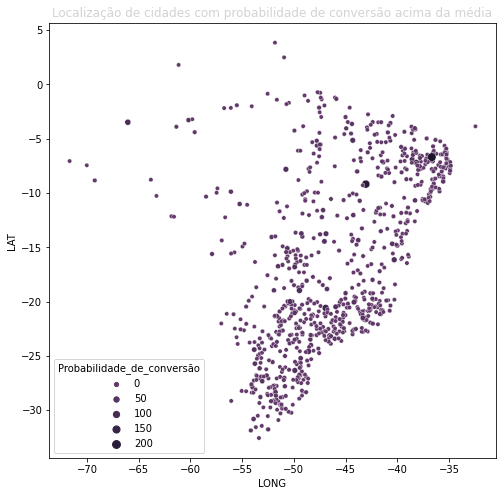

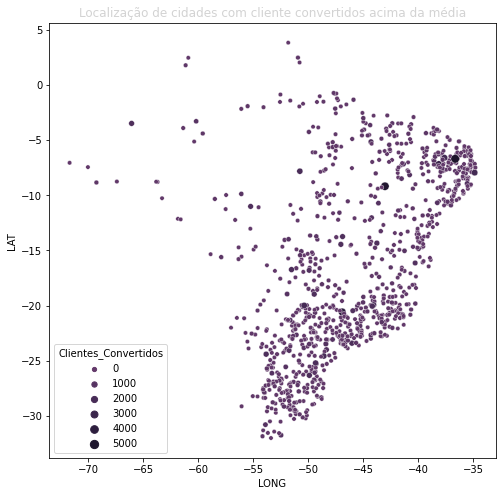

In [119]:
cmap = sns.cubehelix_palette(dark=.1, light=.3, as_cmap=True)


f, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(x=df[df['Probabilidade_de_conversão']>= 2.21].LONG,
                y=df[df['Probabilidade_de_conversão']>= 2.21].LAT ,
                palette =cmap,
                hue=df['Probabilidade_de_conversão'],
                size=df['Probabilidade_de_conversão'])
plt.title("Localização de cidades com probabilidade de conversão acima da média", color = '#D3D3D3')

f, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(x=df[df['Clientes_Convertidos']>= 85].LONG,
                y=df[df['Clientes_Convertidos']>= 85].LAT ,
                palette =cmap,
                hue=df['Clientes_Convertidos'],
                size=df['Clientes_Convertidos'])
plt.title("Localização de cidades com cliente convertidos acima da média", color = '#D3D3D3')
plt.show()

#Referências





[Brasil tem 45 milhões de desbancarizados, diz pesquisa](https://www.infomoney.com.br/minhas-financas/brasil-tem-45-milhoes-de-desbancarizados-diz-pesquisa/)

[Um em cada três brasileiros não tem conta em banco, mostra pesquisa Locomotiva](https://www.ilocomotiva.com.br/single-post/2019/09/24/Um-em-cada-três-brasileiros-não-tem-conta-em-banco-mostra-pesquisa-Locomotiva)

[Os brasileiros e o
dinheiro em espécie](https://static.poder360.com.br/2019/10/Os-brasileiros-e-o-dinheiro-em-especie-Imprensa-Outubro-de-2019.pdf)
***

**Estatísticas de Celulares no Brasil**

Dados sobre o total de telefone celulares nos estados do Brasil.

link: https://www.teleco.com.br/ncel.asp

Data de último acesso:  20/11/2000

Périodo utilizado: Setembro 2020
***

**IBGE**

Estimativas de População - 2020

link: [SIDRA](https://sidra.ibge.gov.br/pesquisa/estimapop/tabelas)

Data de último acesso: 20/11/2000

Périodo utilizado: Ano de 2020
***

 **KAGLE** 

 Brazilian Cities

Série de informações sobre o Brasil(cidades e municipios)

link:https://www.kaggle.com/crisparada/brazilian-cities

Data de último acesso: 20/11/2000

Périodo utilizado: Ano de 2010
***

**Relação deAgências,Postos de Atendimento das Instituições Financeiras e Filiais
Filiais das Administradoras de Consórcio.** 


link: https://www.bcb.gov.br/fis/info/agencias.asp?frame=1

Data de último acesso: 20/11/2000

Périodo utilizado: Outubro 2010